In [44]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt

%matplotlib inline

In [28]:
def getExcel(folders):
    excelfile = os.path.join(folders['main'],folders['excel'])
    info = pd.read_excel(f"{excelfile}", convert_float=True)
    info.columns = map(str.lower, info.columns)
    return(info)    

def cleanup_dimitri(df):

    df[df['rat id']==""] = np.NaN
    df['rat id'].fillna(method='ffill', inplace=True)   # fill empty rows that belong to same rat

    split = df['rat id'].str.split("_", n=2, expand=True)
    del df['rat id']
    df['group'] = split[0]
    df['date'] = split[1]
    df['id'] = split[2]

    split = df['acquisition/scan'].str.split(" ", expand=True)
    del df['acquisition/scan']
    df['acquisition'] = split[0]
    df['scan'] = split[1]

    df['group'].replace(regex=True,inplace=True,to_replace='.* ',value=r'')  # gives sham/sev/mod group (without the meanignless number)
    df.columns = [c.replace(' ', '_') for c in df.columns]  # prevent later errors due to spaces
    df = df.rename(columns={'unnamed:_18': 'comments'})  #rename those with weird names

    return df

In [32]:
folders = {}
folders['main'] = '/mnt/c/Users/felix/OneDrive/WORK/2019ETH/Analysis'   
folders['excel'] = r'AllDimitir_WM_GM_ for_C6_T6_Fsc.xlsx'   # I add comments in there

df = getExcel(folders)
df = cleanup_dimitri(df)

df.head()

,location_estimate,slice_number,cs_horizontal_mm,cs_vertical,area_cm2_gm,area_pu_gm,rm_gm,sd_gm,minimum_gm,maximum_gm,...,rm_wm,sd_wm,minimum_wm,maximum_wm,comments,group,date,id,acquisition,scan
0,T6,12.0,2.84,2.68,0.02,269.0,1650.0,138.00,1450.0,2560.0,...,1690.0,274.0,0.0,4650.0,NaN,sev,20181218,198,T1,E8
1,T6,12.0,NaN,NaN,0.02,380.0,51.8,6.76,0.0,67.4,...,55.9,11.5,0.0,175.0,NaN,sev,20181218,198,T2,E9
2,T6,12.0,2.95,2.42,0.02,242.0,1560.0,140.00,692.0,2220.0,...,1490.0,337.0,0.0,3080.0,NaN,sev,20181219,198,T1,E7
3,T6,12.0,NaN,NaN,0.02,391.0,102.0,49.80,0.0,359.0,...,131.0,76.2,0.0,611.0,NaN,sev,20181219,198,T2,E8
4,T6,28.0,3.05,2.35,0.02,228.0,1540.0,352.00,0.0,2620.0,...,1250.0,424.0,0.0,3180.0,NaN,mod,20181128,210,T1,E7


In [33]:
# display details of a specific animal:

df[(df['id'] == '196')]

,location_estimate,slice_number,cs_horizontal_mm,cs_vertical,area_cm2_gm,area_pu_gm,rm_gm,sd_gm,minimum_gm,maximum_gm,...,rm_wm,sd_wm,minimum_wm,maximum_wm,comments,group,date,id,acquisition,scan
16,T6,15.0,2.97,2.51,0.02,255.0,1580.0,125.00,1340.0,2430.0,...,1590.0,227.0,257.0,2810.0,NaN,sev,20181127,196,T1,E7
17,T6,15.0,NaN,NaN,0.02,356.0,54.5,5.93,42.0,82.4,...,59.4,22.8,0.0,698.0,NaN,sev,20181127,196,T2,E8
18,C6,17.0,4.57,2.73,0.04,532.0,1490.0,125.00,417.0,3050.0,...,1510.0,460.0,0.0,10200.0,C6 scans very distorted (shim not updated?),sev,20181127,196,T1,E24
19,C6,17.0,NaN,NaN,0.04,777.0,49.8,4.79,0.0,73.0,...,58.4,28.3,0.0,798.0,C6 scans very distorted (shim not updated?),sev,20181127,196,T2,E25


parameter: rm_gm 
 5    NaN
Name: comments, dtype: object
parameter: rm_wm 
 3    NaN
Name: comments, dtype: object


,group,id,rm_gm,area_pu_gm,area_pu_wm,rm_wm
1,sev,198,51.8,380.0,954.0,55.9
9,mod,213,59.3,318.0,807.0,64.9
15,mod,214,52.8,328.0,963.0,60.0
17,sev,196,54.5,356.0,1017.0,59.4
21,sham,194,59.5,340.0,1112.0,67.3
25,sham,199,58.3,362.0,998.0,66.0
29,mild,212,50.3,344.0,973.0,49.9
33,mild,217,56.3,328.0,1036.0,54.1
37,sham,203,63.5,365.0,1073.0,55.7
43,sham,221,52.4,400.0,1175.0,57.9


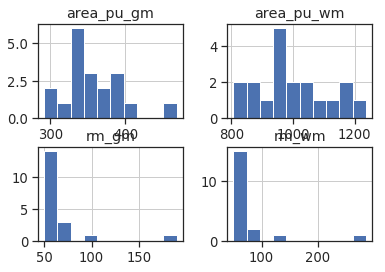

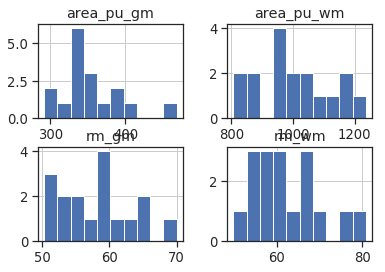

In [41]:
# Select subset of data for analysis

columns = ['group', 'id', 'rm_gm','area_pu_gm','area_pu_wm','rm_wm']

selection = {}
selection['contrast'] = 'T2'
selection['segment'] = 'T6'


selected_rows = df[(df['location_estimate'] == selection['segment']) & (df['acquisition'] == selection['contrast'])]

df_selection = selected_rows[columns]
df_selection.hist();

# check for outliers, missing values etc.
def outlier_check():
    print('Any NaNs? ', df_selection.isnull().values.any())
    # df_selection.info()
    print(df_selection.describe())
    df_selection.hist();
    return


# outlier removal:
# all rows that are larger than x Standard Deviations (SD_cutoff) from mean in any of the tested columns are removed.

testcols = ['rm_gm', 'rm_wm']
maskdf = pd.DataFrame()
SD_cutoff = 2
for c in testcols:
    # df_selection shrinks with each iteration.
    s = ((df_selection[c] - df_selection[c].mean()) / df_selection[c].std()).abs() < SD_cutoff
    
    df_selection = df_selection[s]
    outlier_id = s[s == False]
    print(f"parameter: {c} \n {df.loc[outlier_id.index, 'comments']}")

          
outlier_check
df_selection.hist();
df_selection     

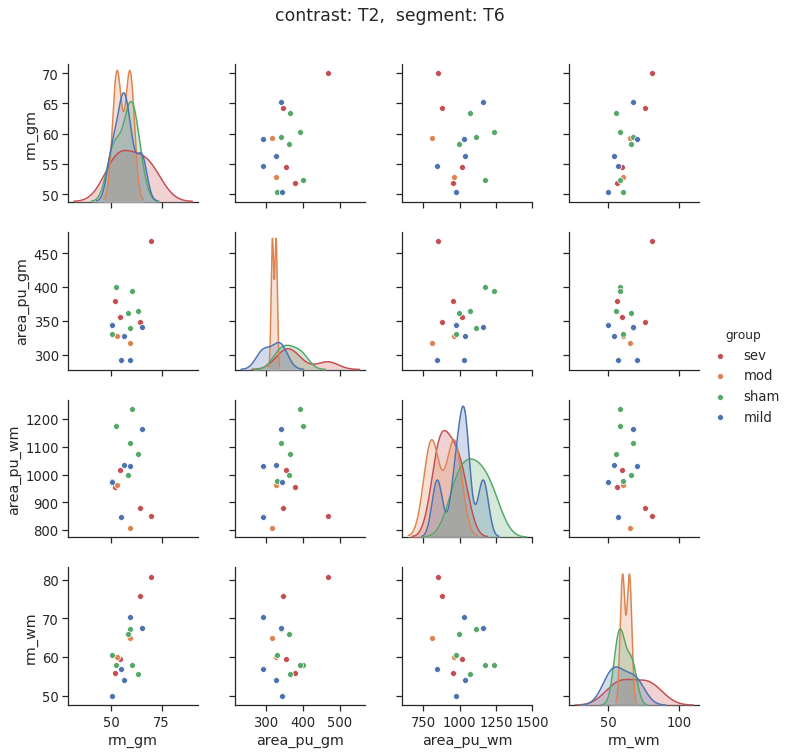

In [42]:
import seaborn as sns


def pairplot_singleDF(df_selection, selection):
    # sns.palplot(sns.color_palette())  # visualize the current palette
    defpal = sns.color_palette()
    newPal = dict(sham = defpal[2], mild = defpal[0], mod = defpal[1], sev = defpal[3])


    df_plot = df_selection.drop(['id'], axis=1)

    # optional code to demean data columns:
    # df_plot = df_selection.drop(['id','group'], axis=1)
    # df_plot = df_plot - df_plot.mean() 
    # df_plot['group'] = df_selection['group']

    sns.set(style="ticks", font_scale=1.2)
    # ax = sns.pairplot(df_plot, hue="group", kind="reg")
    ax = sns.pairplot(df_plot, hue="group", palette=newPal)
    ax.fig.suptitle(f"contrast: {selection['contrast']},  segment: {selection['segment']}", y=1.05);
                    
                    
pairplot_singleDF(df_selection, selection)  # TODO: make widget to select contrast and segments                 

In [47]:
df_test = df_selection.wide_to_long()

df_test

AttributeError: 'DataFrame' object has no attribute 'wide_to_long'

In [ ]:
df_plot = df_selection.drop(['id',''], axis=1



sns.set(style="ticks", palette="pastel")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="day", y="total_bill",
            hue="smoker", palette=["m", "g"],
            data=tips)
sns.despine(offset=10, trim=True)

In [32]:
# statsmodels doesnt work for this kind of data... see mord or sklearn...
# https://stackoverflow.com/questions/38549756/how-can-i-do-ordinal-regression-using-the-mord-module-in-python

import statsmodels.api as sm
from patsy import dmatrices


# df_selection = df_selection.dropna()

y, X = dmatrices("group ~ rm_gm + area_pu_gm + area_pu_wm + rm_wm", data=df_selection, NA_action='drop', return_type='dataframe')


mod = sm.OLS(y, X) # Describe model

res = mod.fit()  # Fit model

print(res.summary())  #Summarize model

/home/felix/miniconda3/envs/python37/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


ValueError: shapes (16,4) and (16,4) not aligned: 4 (dim 1) != 16 (dim 0)